In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms,models
import numpy as np
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
from sklearn import metrics

In [2]:
transform = transforms.Compose([
    #transforms.Grayscale(),
    transforms.ToTensor(),
])

traindataset = datasets.STL10('./downloads/', download=True, split='train', transform=transform)
testdataset = datasets.STL10('./downloads/', download=True, split='test', transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(f'traindataset =>{traindataset.data.shape}')
print(f'testdataset =>{testdataset.data.shape}')

traindataset =>(5000, 3, 96, 96)
testdataset =>(8000, 3, 96, 96)


In [4]:

trainloader = torch.utils.data.DataLoader(traindataset, batch_size=100, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=1000, shuffle=False, num_workers=4)

torch.Size([1000, 3, 96, 96])


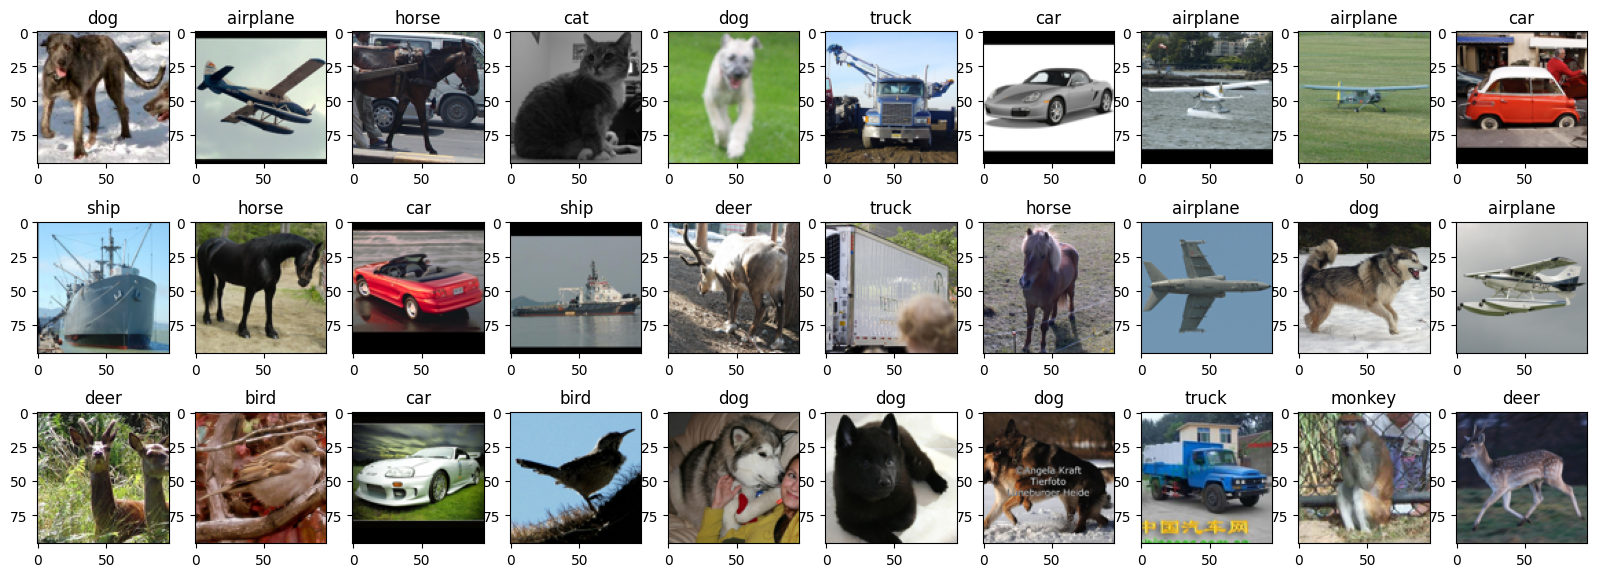

In [5]:
def view_samples():
    
    test_images, labels = next(iter(testloader))
    print(test_images.shape)
    fig = plt.figure(figsize =(20,7))
    nrows = 3
    ncols = 10
    b=np.random.randint(0,test_images.shape[0]-nrows*ncols)
    for i in range(nrows*ncols):
        plot = fig.add_subplot(nrows, ncols, i+1)
        plot.set_title(testdataset.classes[labels[i+b].cpu().numpy()])
        plot.imshow(np.transpose(test_images[i+b], (1, 2, 0)).cpu())
    plt.show()
view_samples()

In [6]:
def plot_training_graphs(loss_list):
    fig = plt.figure(figsize =(20,7))
    plot = fig.add_subplot(1, 2, 1)
    plot.set_title("Training vs Validation loss")
    plot.plot(loss_list[:,0], linestyle='--', label="Training Loss")
    plot.plot(loss_list[:,1], linestyle='-', label="Validation Loss" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Loss")
    plot.legend()
    plot = fig.add_subplot(1, 2, 2)
    plot.set_title("Training vs Validation Accuracy")
    plot.plot(loss_list[:,2], linestyle='--', label="Training Accuracy")
    plot.plot(loss_list[:,3], linestyle='-', label="Validation Accuracy" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Accuracy")
    plot.legend()
    plt.show()

In [7]:
import time
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [12]:
# Train the model
def model_training(model,criterion,optimizer,trainloader,testloader,num_epochs = 10):
    start = time.time()
    loss_list = []
    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0
        train_acc = 0.0
        val_acc = 0.0
        for images, labels in trainloader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*images.size(0)
            train_acc += metrics.accuracy_score(labels,outputs.argmax(axis=1))
        # Evaluate the model on the validation set
        with torch.no_grad():
            images, labels = next(iter(testloader))
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()*images.size(0)
            val_acc += metrics.accuracy_score(labels,outputs.argmax(axis=1))
        train_loss = train_loss/len(trainloader)
        val_loss = val_loss/len(testloader)
        train_acc = train_acc/len(trainloader)
        val_acc = val_acc
        print(f'Epoch: {epoch+1} ({timeSince(start)}) \tTraining Loss: {train_loss:.3f}, \tTest Loss: {val_loss:.3f},  \tTraining acc: {train_acc:.2f}, \tTest acc: {val_acc:.2f}, ')
        loss_list.append([train_loss,val_loss,train_acc,val_acc])
    
    print(f'Training completed in {timeSince(start)} \tTraining Loss: {loss_list[-1][0]:.3f}, \tTest Loss: {loss_list[-1][1]:.3f},  \tTraining acc: {loss_list[-1][2]:.2f}, \tTest acc: {loss_list[-1][3]:.2f}, ')
    return np.array(loss_list),time.time()-start,loss_list[-1][2],loss_list[-1][3]


In [13]:
from sklearn import metrics
import seaborn as sns
#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred_probs, label):
    Y_pred = Y_pred_probs.argmax(axis=1)
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = metrics.accuracy_score(Y_test, Y_pred)

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

    top_5_accuracy = metrics.top_k_accuracy_score(Y_test,Y_pred_probs,k=5,labels=np.arange(10))

    plt.figure(figsize=(10, 10))
    plt.title(f'Top 1 Accuracy : {overallAccuracy*100:3.2f}% | Top 5 Accuracy : {top_5_accuracy*100:3.2f}% ', size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print(f'Top 1 Accuracy: {overallAccuracy*100:3.3f}%')
    print(f'Top 5 Accuracy: {top_5_accuracy*100}%')
    print(f'Classwise Accuracy Score: \n{classwiseAccuracy}')

Selected optimizer : Adam
Epoch: 1 (1m 36s) 	Training Loss: 83.898, 	Test Loss: 77.968,  	Training acc: 0.72, 	Test acc: 0.80, 
Epoch: 2 (3m 19s) 	Training Loss: 30.578, 	Test Loss: 89.951,  	Training acc: 0.89, 	Test acc: 0.78, 
Epoch: 3 (5m 0s) 	Training Loss: 23.362, 	Test Loss: 87.441,  	Training acc: 0.92, 	Test acc: 0.80, 
Epoch: 4 (6m 41s) 	Training Loss: 20.213, 	Test Loss: 90.911,  	Training acc: 0.94, 	Test acc: 0.80, 
Epoch: 5 (8m 22s) 	Training Loss: 10.680, 	Test Loss: 92.853,  	Training acc: 0.96, 	Test acc: 0.81, 
Epoch: 6 (10m 7s) 	Training Loss: 10.129, 	Test Loss: 95.463,  	Training acc: 0.97, 	Test acc: 0.80, 
Epoch: 7 (11m 56s) 	Training Loss: 7.425, 	Test Loss: 101.722,  	Training acc: 0.97, 	Test acc: 0.81, 
Epoch: 8 (13m 44s) 	Training Loss: 8.093, 	Test Loss: 103.148,  	Training acc: 0.97, 	Test acc: 0.81, 
Epoch: 9 (15m 32s) 	Training Loss: 8.514, 	Test Loss: 105.761,  	Training acc: 0.97, 	Test acc: 0.80, 
Epoch: 10 (17m 20s) 	Training Loss: 5.577, 	Test Loss:

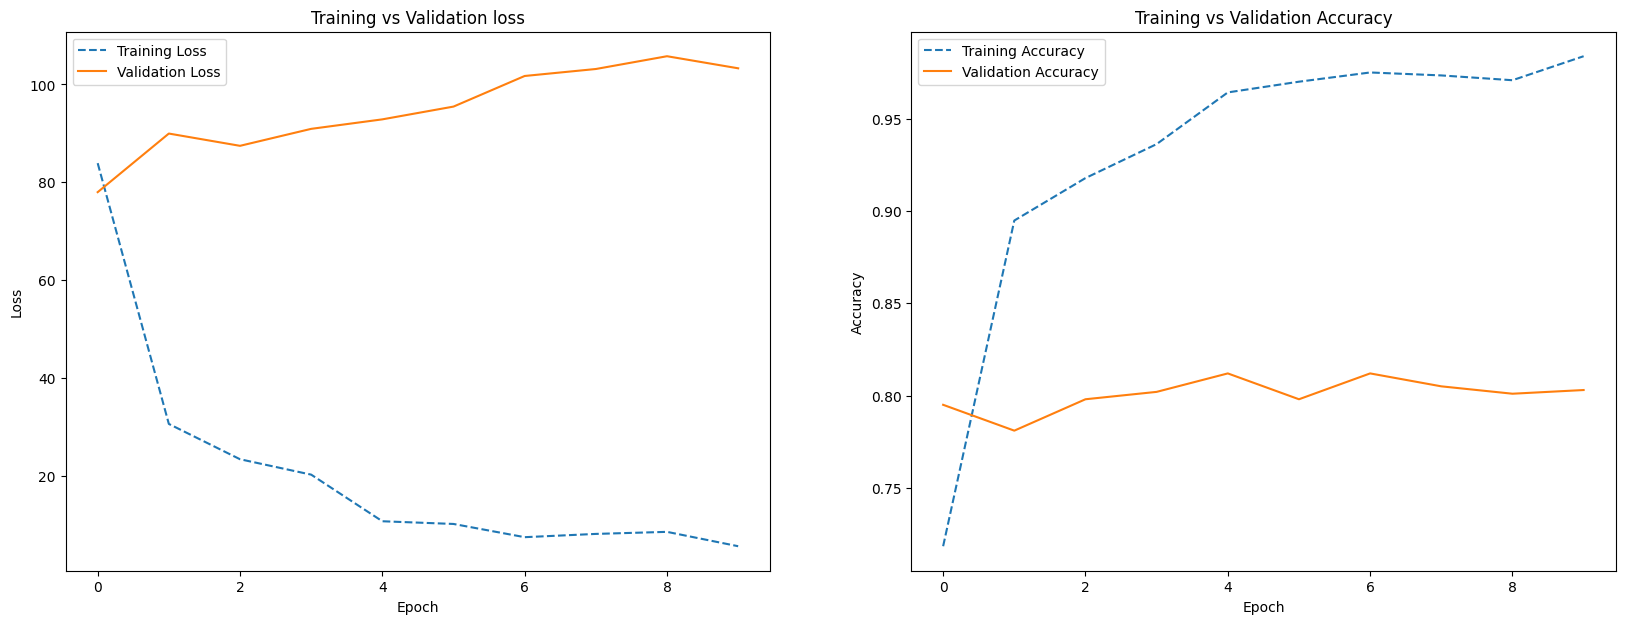

Confusion Matrix for : Adam


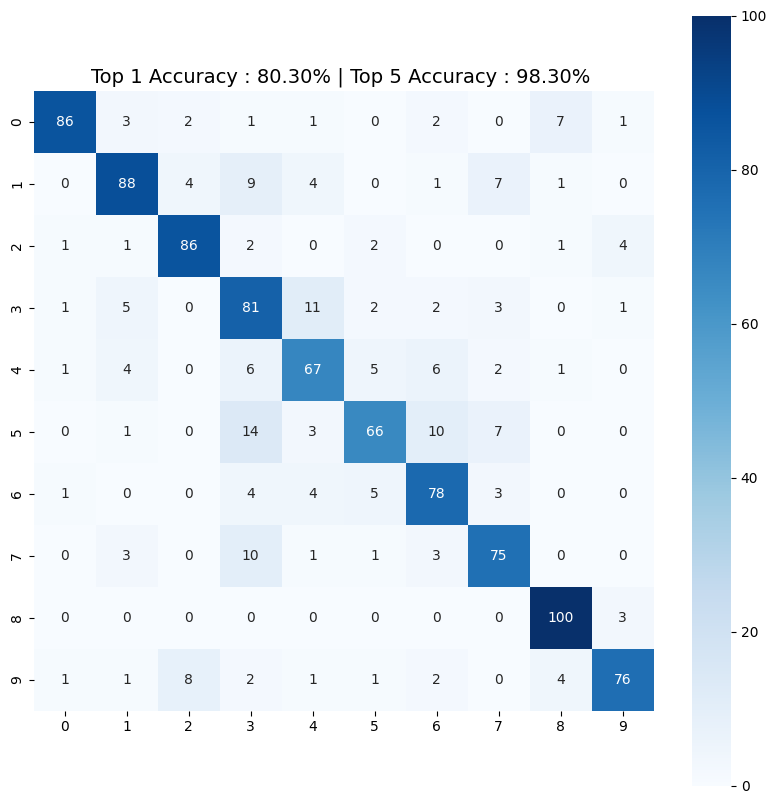

Top 1 Accuracy: 80.300%
Top 5 Accuracy: 98.3%
Classwise Accuracy Score: 
[0.83495146 0.77192982 0.88659794 0.76415094 0.72826087 0.65346535
 0.82105263 0.80645161 0.97087379 0.79166667]
Selected optimizer : Adagrad
Epoch: 1 (2m 10s) 	Training Loss: 56.015, 	Test Loss: 43.699,  	Training acc: 0.81, 	Test acc: 0.89, 
Epoch: 2 (4m 0s) 	Training Loss: 6.734, 	Test Loss: 40.328,  	Training acc: 0.99, 	Test acc: 0.90, 
Epoch: 3 (5m 51s) 	Training Loss: 1.880, 	Test Loss: 40.620,  	Training acc: 1.00, 	Test acc: 0.90, 
Epoch: 4 (7m 36s) 	Training Loss: 0.986, 	Test Loss: 40.605,  	Training acc: 1.00, 	Test acc: 0.90, 
Epoch: 5 (9m 18s) 	Training Loss: 0.700, 	Test Loss: 41.280,  	Training acc: 1.00, 	Test acc: 0.90, 
Epoch: 6 (10m 58s) 	Training Loss: 0.528, 	Test Loss: 41.737,  	Training acc: 1.00, 	Test acc: 0.90, 
Epoch: 7 (12m 41s) 	Training Loss: 0.418, 	Test Loss: 41.708,  	Training acc: 1.00, 	Test acc: 0.89, 
Epoch: 8 (14m 23s) 	Training Loss: 0.379, 	Test Loss: 41.983,  	Training acc

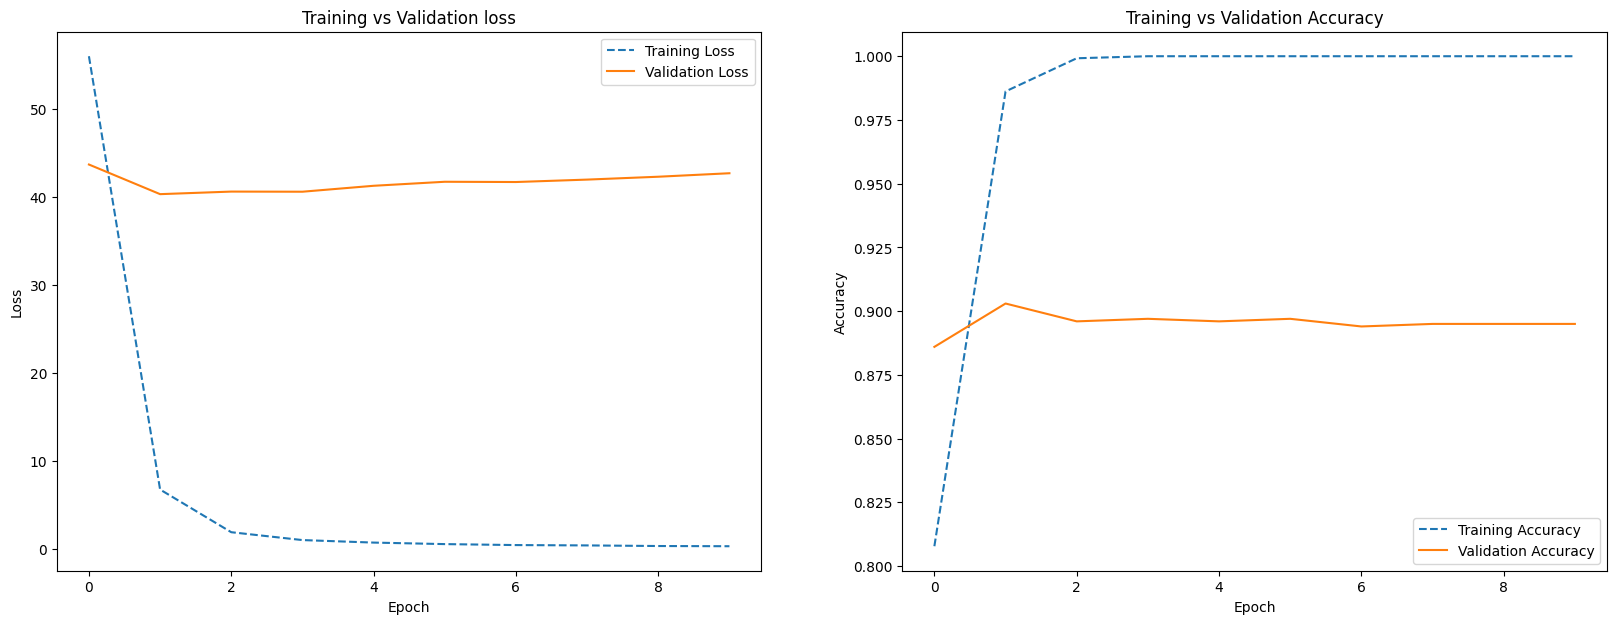

Confusion Matrix for : Adagrad


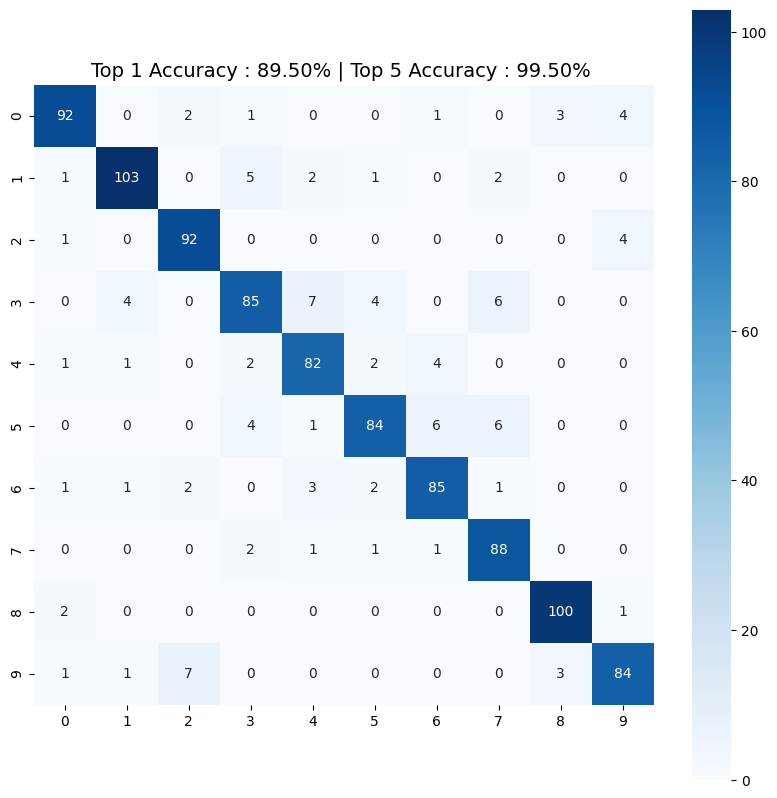

Top 1 Accuracy: 89.500%
Top 5 Accuracy: 99.5%
Classwise Accuracy Score: 
[0.89320388 0.90350877 0.94845361 0.80188679 0.89130435 0.83168317
 0.89473684 0.94623656 0.97087379 0.875     ]
Selected optimizer : Adadelta
Epoch: 1 (2m 3s) 	Training Loss: 248.905, 	Test Loss: 298.940,  	Training acc: 0.12, 	Test acc: 0.17, 
Epoch: 2 (4m 29s) 	Training Loss: 228.871, 	Test Loss: 276.831,  	Training acc: 0.19, 	Test acc: 0.23, 
Epoch: 3 (6m 13s) 	Training Loss: 210.492, 	Test Loss: 256.669,  	Training acc: 0.26, 	Test acc: 0.28, 
Epoch: 4 (7m 59s) 	Training Loss: 193.795, 	Test Loss: 238.481,  	Training acc: 0.34, 	Test acc: 0.35, 
Epoch: 5 (9m 44s) 	Training Loss: 179.362, 	Test Loss: 222.180,  	Training acc: 0.42, 	Test acc: 0.42, 
Epoch: 6 (11m 27s) 	Training Loss: 165.398, 	Test Loss: 207.582,  	Training acc: 0.50, 	Test acc: 0.48, 
Epoch: 7 (13m 11s) 	Training Loss: 153.858, 	Test Loss: 194.700,  	Training acc: 0.55, 	Test acc: 0.53, 
Epoch: 8 (14m 53s) 	Training Loss: 143.959, 	Test Loss:

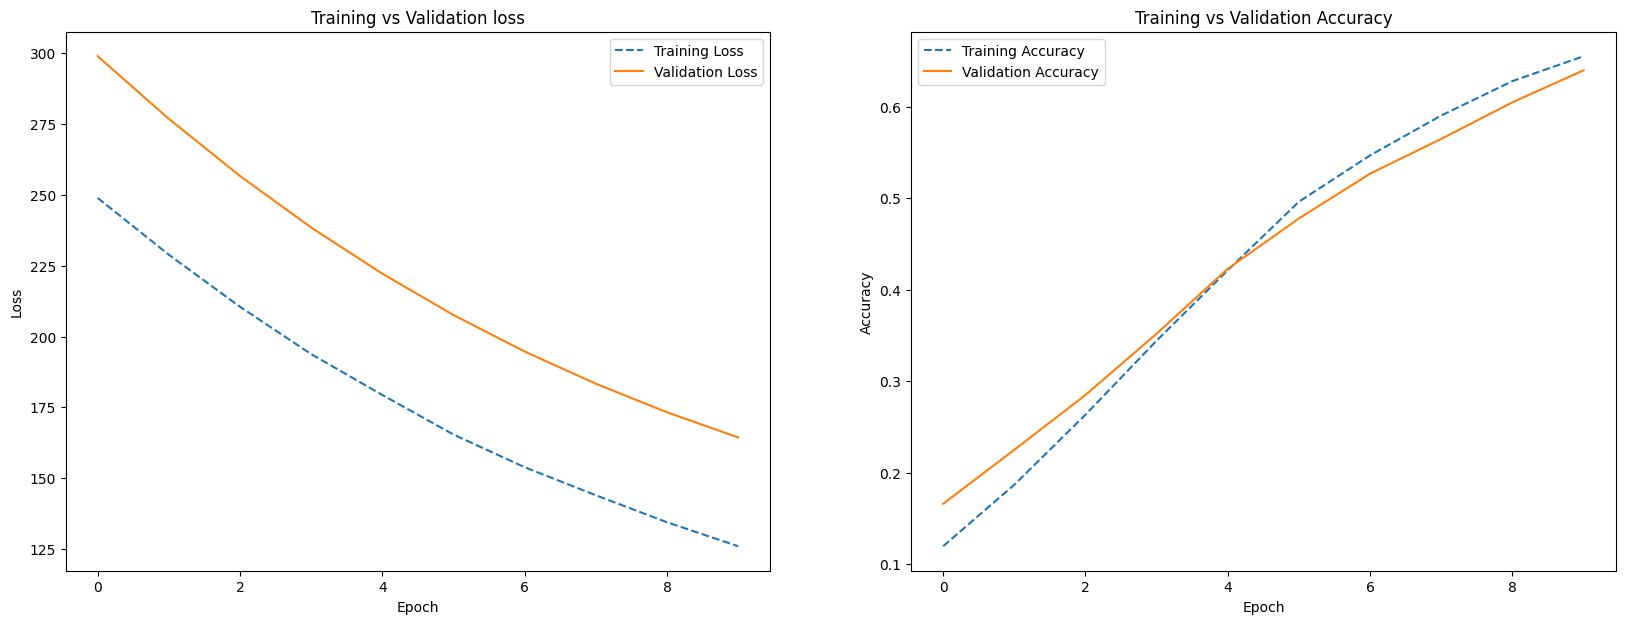

Confusion Matrix for : Adadelta


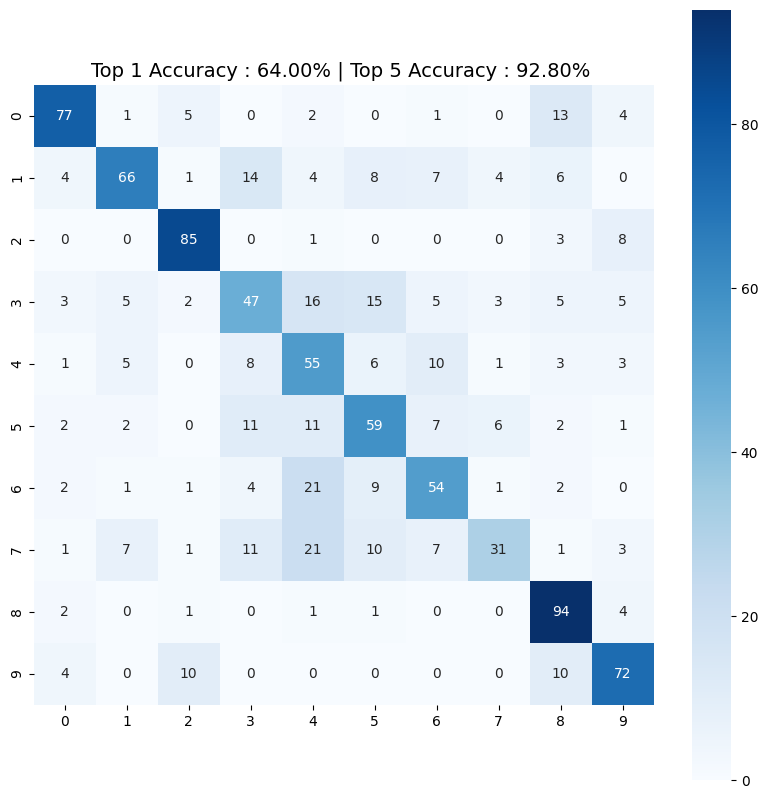

Top 1 Accuracy: 64.000%
Top 5 Accuracy: 92.80000000000001%
Classwise Accuracy Score: 
[0.74757282 0.57894737 0.87628866 0.44339623 0.59782609 0.58415842
 0.56842105 0.33333333 0.91262136 0.75      ]
Selected optimizer : RMSprop
Epoch: 1 (1m 59s) 	Training Loss: 242.102, 	Test Loss: 219.381,  	Training acc: 0.17, 	Test acc: 0.30, 
Epoch: 2 (3m 47s) 	Training Loss: 163.135, 	Test Loss: 178.774,  	Training acc: 0.36, 	Test acc: 0.43, 
Epoch: 3 (5m 33s) 	Training Loss: 128.898, 	Test Loss: 148.749,  	Training acc: 0.52, 	Test acc: 0.56, 
Epoch: 4 (7m 14s) 	Training Loss: 98.366, 	Test Loss: 123.256,  	Training acc: 0.64, 	Test acc: 0.65, 
Epoch: 5 (9m 0s) 	Training Loss: 74.452, 	Test Loss: 120.281,  	Training acc: 0.73, 	Test acc: 0.66, 
Epoch: 6 (10m 43s) 	Training Loss: 53.452, 	Test Loss: 104.523,  	Training acc: 0.81, 	Test acc: 0.72, 
Epoch: 7 (12m 25s) 	Training Loss: 36.147, 	Test Loss: 127.490,  	Training acc: 0.87, 	Test acc: 0.71, 
Epoch: 8 (14m 10s) 	Training Loss: 23.028, 	Tes

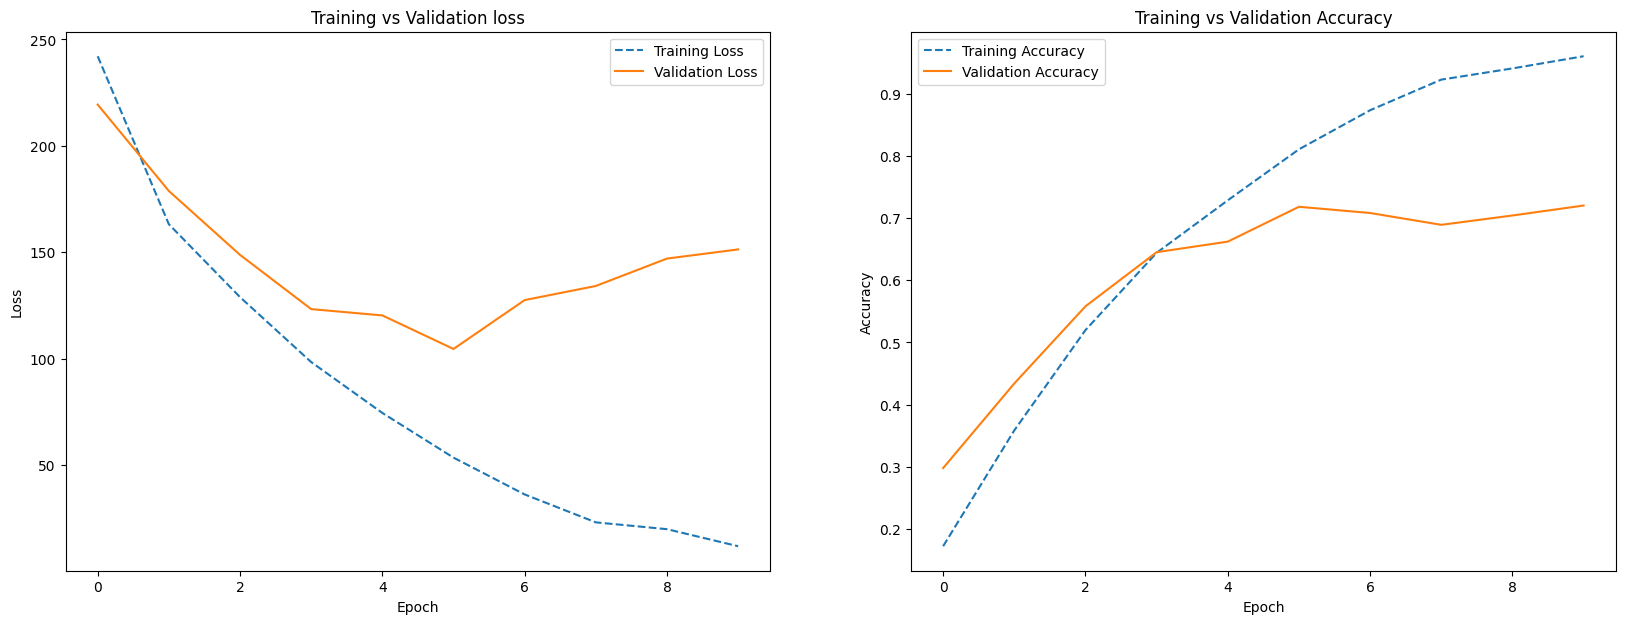

Confusion Matrix for : RMSprop


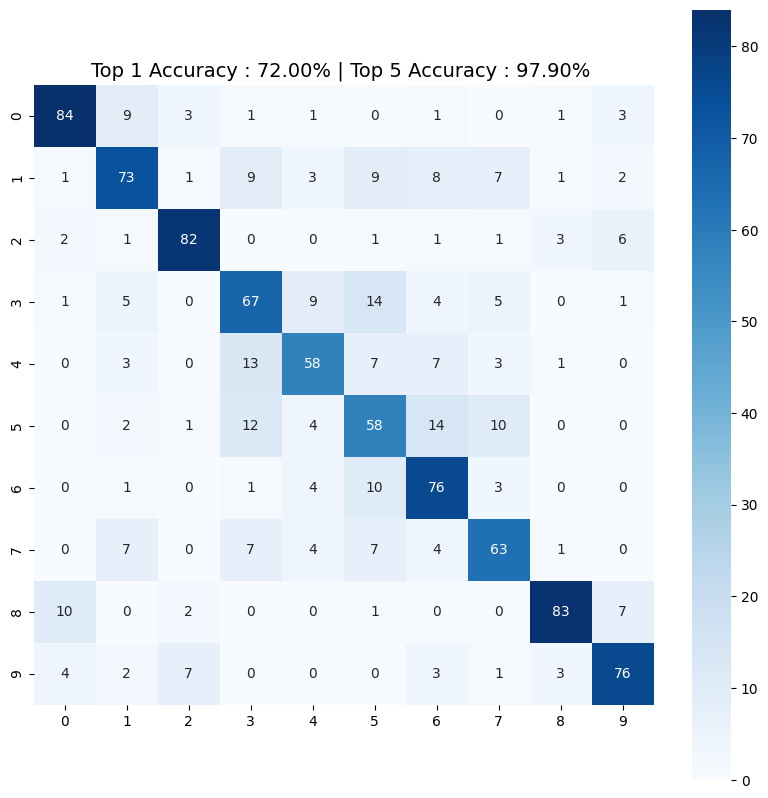

Top 1 Accuracy: 72.000%
Top 5 Accuracy: 97.89999999999999%
Classwise Accuracy Score: 
[0.81553398 0.64035088 0.84536082 0.63207547 0.63043478 0.57425743
 0.8        0.67741935 0.80582524 0.79166667]


In [14]:
selected_optimizers:list[torch.optim.Optimizer] = [torch.optim.Adam,torch.optim.Adagrad,torch.optim.Adadelta,torch.optim.RMSprop]
selected_optimizers_names = ['Adam','Adagrad','Adadelta','RMSprop']
trng_time_list = []
trng_acc_list = []
test_acc_list = []
for i,optimizer in enumerate(selected_optimizers):
    print(f'Selected optimizer : {selected_optimizers_names[i]}')
    # Load the pre-trained ResNet18 model
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    # Replace the final fully connected layer
    num_classes = 10
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    # Define the optimizer and loss function

    optimizer_inst =  optimizer(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    loss_list,t,train_a,test_a = model_training(model,criterion,optimizer_inst,trainloader,testloader,num_epochs=10)
    trng_time_list.append(t)
    trng_acc_list.append(train_a)
    test_acc_list.append(test_a)
    plot_training_graphs(loss_list)
    test_images, test_labels = next(iter(testloader))
    test_output = model(test_images)
    with torch.no_grad():
        print(f'Confusion Matrix for : {selected_optimizers_names[i]}')
        confusionMatrixAndAccuracyReport(test_labels,test_output,testdataset.classes)

## Comparison

In [45]:
import pandas as pd

df = pd.DataFrame()
df['optimizer']=selected_optimizers_names
df['trng_acc']=trng_acc_list
df['test_acc']=test_acc_list
df['trng_time']=trng_time_list
print(df.to_markdown())

|    | optimizer   |   trng_acc |   test_acc |   trng_time |
|---:|:------------|-----------:|-----------:|------------:|
|  0 | Adam        |     0.9838 |      0.803 |     1040.36 |
|  1 | Adagrad     |     1      |      0.895 |     1064.66 |
|  2 | Adadelta    |     0.6554 |      0.64  |     1100.61 |
|  3 | RMSprop     |     0.96   |      0.72  |     1053.67 |


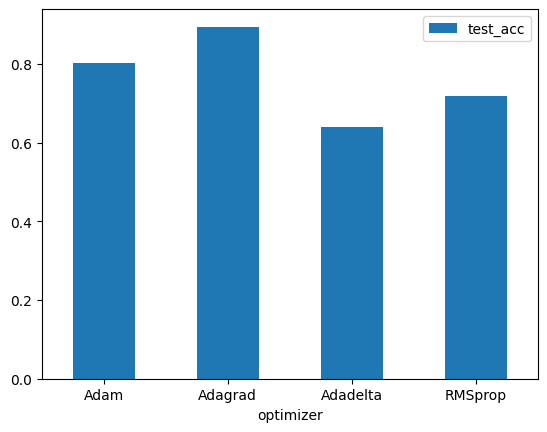

In [55]:
ax = df.plot(x="optimizer", y=["test_acc"], kind="bar", rot=0,) #, "trng_acc", "trng_time"